In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda7\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Getting the Training and Testing data

In [2]:
df=pd.read_excel(r"F:\Family\Nandha\ML & DL Projects\Flight-Price-Prediction-master\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df1=pd.read_excel(r"F:\Family\Nandha\ML & DL Projects\Flight-Price-Prediction-master\Test_set.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df.shape

(10683, 11)

In [5]:
df1.shape

(2671, 10)

### Concatenating Training and Testing Datasets

In [6]:
data=df.append(df1,sort=False)
data.shape

(13354, 11)

In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Feature Engineering

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [10]:
## First, we will try to split the Date_of_Journey Column into Day month and year as separate columns

data["Day"]=data["Date_of_Journey"].str.split("/").str[0]
data["Month"]=data["Date_of_Journey"].str.split("/").str[1]
data["Year"]=data["Date_of_Journey"].str.split("/").str[2]

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Day                 object
Month               object
Year                object
dtype: object

In [13]:
### Typecasting

data["Day"]=data["Day"].astype(int)
data["Month"]=data["Month"].astype(int)
data["Year"]=data["Year"].astype(int)

In [14]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
dtype: object

In [15]:
data=data.drop(['Date_of_Journey'],axis=1)

In [16]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
### We can see that The feature Arrival time has some inadequate data in it, So we will try to reorder it.

data["Arrival_Time"]=data["Arrival_Time"].str.split(" ").str[0]

In [18]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [19]:
### Now lets check the Missing Values

data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
dtype: int64

In [20]:
### We can see that the feature Total_stops and route has one null values and Price has 2671 Null values

data["Total_Stops"]=data["Total_Stops"].fillna("1 stop")

In [21]:
pd.Categorical(data["Total_Stops"])

[non-stop, 2 stops, 2 stops, 1 stop, 1 stop, ..., 1 stop, non-stop, 1 stop, 1 stop, 1 stop]
Length: 13354
Categories (5, object): [1 stop, 2 stops, 3 stops, 4 stops, non-stop]

In [22]:
### We will convert Non stop into 0 Zero

data["Total_Stops"]=data["Total_Stops"].replace('non-stop','0 stops')
data["Total_Stops"]=data["Total_Stops"].replace('1 stop','1 stops')

In [23]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stops,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stops,No info,13302.0,1,3,2019


In [24]:
### We will try to split the Total_Stops into a Numerical Fetaure

data["Stops"]=data["Total_Stops"].str.split(" ").str[0]
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stops,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stops,No info,13302.0,1,3,2019,1


In [25]:
## we will convert the Stops feature into Integer datatype

data["Stops"]=data["Stops"].astype(int)

In [26]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
Stops                int32
dtype: object

In [27]:
data=data.drop(["Total_Stops"],axis=1)

In [28]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [29]:
### Now we will to try to split the Arrival time into Arrival hour and Arrival Minutes & Similarly to the Depature_Time

data["Arrival_hr"]=data["Arrival_Time"].str.split(":").str[0]
data["Arrival_min"]=data["Arrival_Time"].str.split(":").str[1]
data["Dep_hr"]=data["Dep_Time"].str.split(":").str[0]
data["Dep_min"]=data["Dep_Time"].str.split(":").str[1]
data=data.drop(["Dep_Time"],axis=1)

In [30]:
data=data.drop(["Arrival_Time"],axis=1)

In [31]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Day,Month,Year,Stops,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [32]:
### Now lets handle the Route feature.. We will split Each city into Route_1,Route_2,Route_3,Route_4 etc

data["Route_1"]=data["Route"].str.split("→ ").str[0]
data["Route_2"]=data["Route"].str.split("→ ").str[1]
data["Route_3"]=data["Route"].str.split("→ ").str[2]
data["Route_4"]=data["Route"].str.split("→ ").str[3]
data["Route_5"]=data["Route"].str.split("→ ").str[4]
data=data.drop(["Route"],axis=1)


In [33]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Day,Month,Year,Stops,Arrival_hr,Arrival_min,Dep_hr,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,01,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,13,15,05,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,04,25,09,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,05,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [34]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Additional_Info        0
Price               2671
Day                    0
Month                  0
Year                   0
Stops                  0
Arrival_hr             0
Arrival_min            0
Dep_hr                 0
Dep_min                0
Route_1                1
Route_2                1
Route_3             4341
Route_4            11397
Route_5            13296
dtype: int64

In [35]:
### We will replace the null values of the price column by filling the mean Values

data["Price"].fillna(data["Price"].mean(),inplace=True)

In [36]:
### We can also replace the Nan values of Route_1,Route_2,Route_3,Route_4.Route_5 by a category called None

data["Route_1"].fillna("None",inplace=True)
data["Route_2"].fillna("None",inplace=True)
data["Route_3"].fillna("None",inplace=True)
data["Route_4"].fillna("None",inplace=True)
data["Route_5"].fillna("None",inplace=True)

In [37]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Stops              0
Arrival_hr         0
Arrival_min        0
Dep_hr             0
Dep_min            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [38]:
data=data.drop(["Duration"],axis=1)
data.head()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Stops,Arrival_hr,Arrival_min,Dep_hr,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,01,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,05,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,04,25,09,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,05,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [39]:
### Let encode the Categorical feature Airline,Source,Destination,Additional_Info,Route_1,Route_2,Route_3,Route_4 and 
### Route_5 into Numerical features

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Airline"]=encoder.fit_transform(data["Airline"])
data["Source"]=encoder.fit_transform(data["Source"])
data["Destination"]=encoder.fit_transform(data["Destination"])
data["Additional_Info"]=encoder.fit_transform(data["Additional_Info"])
data["Route_1"]=encoder.fit_transform(data["Route_1"])
data["Route_2"]=encoder.fit_transform(data["Route_2"])
data["Route_3"]=encoder.fit_transform(data["Route_3"])
data["Route_4"]=encoder.fit_transform(data["Route_4"])
data["Route_5"]=encoder.fit_transform(data["Route_5"])


In [40]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Stops,Arrival_hr,Arrival_min,Dep_hr,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,01,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,05,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,04,25,09,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,05,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


### Feature Selection

In [41]:
X=data.drop(["Price"],axis=1)

In [42]:
X.head()

,Airline,Source,Destination,Additional_Info,Day,Month,Year,Stops,Arrival_hr,Arrival_min,Dep_hr,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,2019,0,01,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2019,2,13,15,05,50,2,25,1,3,4
2,4,2,1,8,9,6,2019,2,04,25,09,25,3,32,4,5,4
3,3,3,0,8,12,5,2019,1,23,30,18,05,2,34,3,12,4
4,3,0,5,8,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [43]:
y=data["Price"]
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [44]:
X.shape

(13354, 17)

In [45]:
y.shape

(13354,)

In [46]:
### Splitting Data into Train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

### Linear Regression

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()
mse=cross_val_score(lr,X,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-11257202.949744588


### Ridge Regression

In [54]:
from sklearn.linear_model import Ridge
## For selecting the Alpha values we use GridsearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28006e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31392e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2788e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3276e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32444e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\rid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-11255901.306345962


### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [59]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)


C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52556670691.566696, tolerance: 16700644.313321259
  positive)
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54733125120.437355, tolerance: 17343802.72816037
  positive)
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52696364828.12885, tolerance: 16820280.90463898
  positive)
C:\ProgramData\Anaconda7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [60]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-11257255.871630289


In [61]:
## Prediction of Both Ridge and Lasso
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

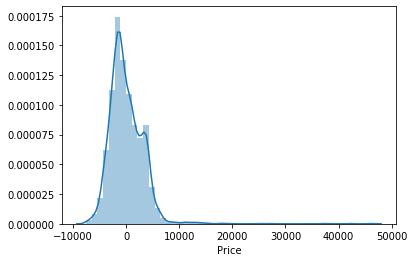

In [64]:
sns.distplot(y_test-prediction_lasso)

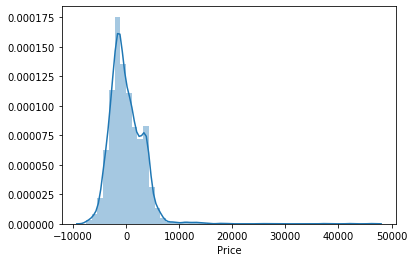

In [65]:
sns.distplot(y_test-prediction_ridge)